In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv("sales_data.csv")
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
data.tail()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David
999,1086,2023-08-16,Alice,East,4923.93,48,Food,2632.58,2926.68,Returning,0.14,Cash,Online,East-Alice


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
data.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [8]:
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])
data['Year']=data['Sale_Date'].dt.year
data['Month']=data['Sale_Date'].dt.month
data['Day']=data['Sale_Date'].dt.day
data['Weekday']=data['Sale_Date'].dt.dayofweek

print(data.head())

   Product_ID  Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052 2023-02-03       Bob  North       5053.97             18   
1        1093 2023-04-21       Bob   West       4384.02             17   
2        1015 2023-09-21     David  South       4631.23             30   
3        1072 2023-08-24       Bob  South       2167.94             39   
4        1061 2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  Year  Month  Day  Weekday  
0           Cash        Online            North-Bob  2023  

In [9]:
invalid_prices = data[data['Unit_Price']<=data['Unit_Cost']]
print("Number of invalid rows: ", len(invalid_prices))

data[data['Unit_Price'] > data['Unit_Cost']]

Number of invalid rows:  0


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Day,Weekday
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2,3,4
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,4,21,4
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,9,21,3
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,8,24,3
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,3,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie,2023,4,15,5
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob,2023,9,7,3
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David,2023,4,27,3
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David,2023,12,20,2


In [10]:
data.dropna()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Day,Weekday
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2,3,4
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,4,21,4
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,9,21,3
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,8,24,3
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,3,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie,2023,4,15,5
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob,2023,9,7,3
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David,2023,4,27,3
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David,2023,12,20,2


In [12]:
print(f"Number od duplicated rows: {data.duplicated().sum()}")

Number od duplicated rows: 0


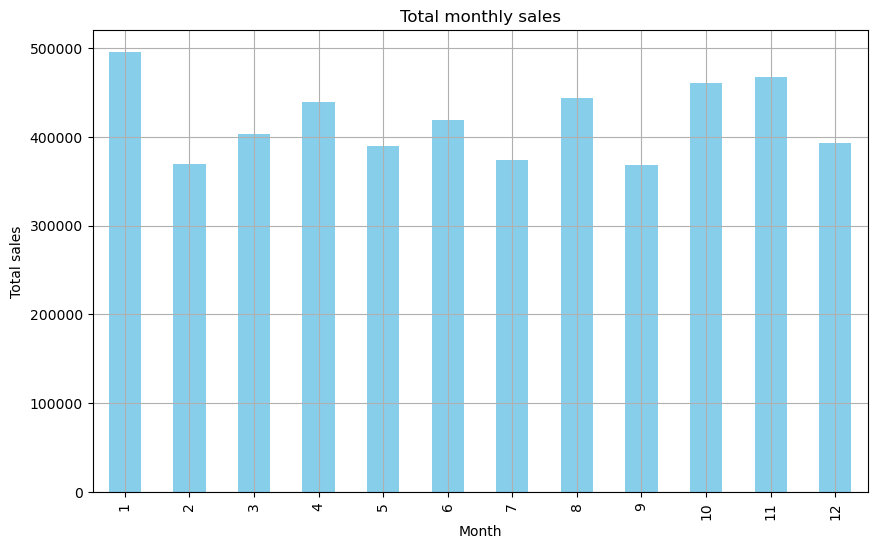

In [14]:
monthly_sales = data.groupby('Month')['Sales_Amount'].sum()
monthly_sales.plot(kind='bar',figsize=(10,6), title = 'Total monthly sales', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.grid(True)
plt.show()

In [ ]:
print(f"Total products sold: {data['Quantity_Sold'].sum()}")
print(f"Total sales amount: {data['Sales_Amount'].sum()}")
print(f"Most frequent payment method:\n{data['Payment_Method'].value_counts()}")
print(f"Sales by product category:\n{data['Product_Category'].value_counts()}")


Total products sold: 25355
Total sales amount: 5019265.2299999995
Most frequent payment method:  Payment_Method
Credit Card      345
Bank Transfer    342
Cash             313
Name: count, dtype: int64
Sales by product category: <bound method IndexOpsMixin.value_counts of 0        Furniture
1        Furniture
2             Food
3         Clothing
4      Electronics
          ...     
995           Food
996       Clothing
997       Clothing
998    Electronics
999           Food
Name: Product_Category, Length: 1000, dtype: object>
